#Travel & Accomodoation Data Analyse
##Here I provided a dataset simulating real corporate travel systems - focusing on flights and hotels. Analyze this set with over one thousand users and 250 thousand travels to produce insights. 

In [ ]:
#import all packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [ ]:
#import Dataset of Travel & Accomodation
data1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Ana projct/users.csv')
data2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Ana projct/flights.csv')
data3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Ana projct/hotels.csv')


In [ ]:
print(data1.head())
print(data1.tail())

   code company             name  gender  age
0     0    4You        Roy Braun    male   21
1     1    4You   Joseph Holsten    male   37
2     2    4You    Wilma Mcinnis  female   48
3     3    4You     Paula Daniel  female   23
4     4    4You  Patricia Carson  female   44
      code        company              name  gender  age
1335  1335  Umbrella LTDA  Albert Garroutte    male   23
1336  1336  Umbrella LTDA        Kim Shores  female   40
1337  1337  Umbrella LTDA     James Gimenez    male   28
1338  1338  Umbrella LTDA      Viola Agosta  female   52
1339  1339  Umbrella LTDA    Paul Rodriguez    male   35


In [ ]:
print(data2.head())
print(data2.tail())

   travelCode  userCode                from  ... distance       agency        date
0           0         0         Recife (PE)  ...   676.53  FlyingDrops  09/26/2019
1           0         0  Florianopolis (SC)  ...   676.53  FlyingDrops  09/30/2019
2           1         0       Brasilia (DF)  ...   637.56      CloudFy  10/03/2019
3           1         0  Florianopolis (SC)  ...   637.56      CloudFy  10/04/2019
4           2         0        Aracaju (SE)  ...   830.86      CloudFy  10/10/2019

[5 rows x 10 columns]
        travelCode  userCode  ...   agency        date
271883      135941      1339  ...  CloudFy  07/12/2020
271884      135942      1339  ...  CloudFy  07/16/2020
271885      135942      1339  ...  CloudFy  07/20/2020
271886      135943      1339  ...  CloudFy  07/23/2020
271887      135943      1339  ...  CloudFy  07/26/2020

[5 rows x 10 columns]


In [ ]:
print(data3.head())
print(data3.tail())

   travelCode  userCode     name  ...   price    total        date
0           0         0  Hotel A  ...  313.02  1252.08  09/26/2019
1           2         0  Hotel K  ...  263.41   526.82  10/10/2019
2           7         0  Hotel K  ...  263.41   790.23  11/14/2019
3          11         0  Hotel K  ...  263.41  1053.64  12/12/2019
4          13         0  Hotel A  ...  313.02   313.02  12/26/2019

[5 rows x 8 columns]
       travelCode  userCode      name  ...   price   total        date
40547      135938      1339  Hotel BP  ...  247.62  742.86  06/18/2020
40548      135939      1339  Hotel BP  ...  247.62  247.62  06/25/2020
40549      135940      1339  Hotel BW  ...   60.39  181.17  07/02/2020
40550      135941      1339  Hotel BW  ...   60.39  181.17  07/09/2020
40551      135942      1339  Hotel BD  ...  242.88  971.52  07/16/2020

[5 rows x 8 columns]


In [ ]:
#Combine flights & hotel data 
df = pd.merge(data2, data3, how='inner', on=['userCode', 'travelCode'])
df.head()

,travelCode,userCode,from,to,flightType,price_x,time,distance,agency,date_x,name,place,days,price_y,total,date_y
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,09/26/2019,Hotel A,Florianopolis (SC),4,313.02,1252.08,09/26/2019
1,0,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,09/30/2019,Hotel A,Florianopolis (SC),4,313.02,1252.08,09/26/2019
2,2,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,10/10/2019,Hotel K,Salvador (BH),2,263.41,526.82,10/10/2019
3,2,0,Salvador (BH),Aracaju (SE),firstClass,1531.92,2.16,830.86,CloudFy,10/12/2019,Hotel K,Salvador (BH),2,263.41,526.82,10/10/2019
4,7,0,Aracaju (SE),Salvador (BH),economic,964.83,2.16,830.86,CloudFy,11/14/2019,Hotel K,Salvador (BH),3,263.41,790.23,11/14/2019


In [ ]:
#df.tail()

In [ ]:
#Rename user column from code to usercode
df1 = df.rename(columns={"date_x" : "Flight_Date","date_y" : "Hotel_Date"  , "price_x" : "Price(Flight)","price_y" : "Price(Hotel)"})
df1

,travelCode,userCode,from,to,flightType,Price(Flight),time,distance,agency,Flight_Date,name,place,days,Price(Hotel),total,Hotel_Date
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,09/26/2019,Hotel A,Florianopolis (SC),4,313.02,1252.08,09/26/2019
1,0,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,09/30/2019,Hotel A,Florianopolis (SC),4,313.02,1252.08,09/26/2019
2,2,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,10/10/2019,Hotel K,Salvador (BH),2,263.41,526.82,10/10/2019
3,2,0,Salvador (BH),Aracaju (SE),firstClass,1531.92,2.16,830.86,CloudFy,10/12/2019,Hotel K,Salvador (BH),2,263.41,526.82,10/10/2019
4,7,0,Aracaju (SE),Salvador (BH),economic,964.83,2.16,830.86,CloudFy,11/14/2019,Hotel K,Salvador (BH),3,263.41,790.23,11/14/2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81099,135940,1339,Campo Grande (MS),Florianopolis (SC),firstClass,1341.21,1.49,573.81,Rainbow,07/05/2020,Hotel BW,Campo Grande (MS),3,60.39,181.17,07/02/2020
81100,135941,1339,Florianopolis (SC),Campo Grande (MS),firstClass,949.58,1.49,573.81,CloudFy,07/09/2020,Hotel BW,Campo Grande (MS),3,60.39,181.17,07/09/2020
81101,135941,1339,Campo Grande (MS),Florianopolis (SC),firstClass,1446.34,1.49,573.81,CloudFy,07/12/2020,Hotel BW,Campo Grande (MS),3,60.39,181.17,07/09/2020
81102,135942,1339,Florianopolis (SC),Natal (RN),economic,726.95,1.84,709.37,CloudFy,07/16/2020,Hotel BD,Natal (RN),4,242.88,971.52,07/16/2020


In [ ]:
#Rename user column from code to usercode
df2 = data1.rename(columns={"code" : "userCode"})
#df2

In [ ]:
#combining user,(flight&hotel) dataset
df=pd.merge(df1,df2 , how='inner', on=['userCode'])
df

,travelCode,userCode,from,to,flightType,Price(Flight),time,distance,agency,Flight_Date,name_x,place,days,Price(Hotel),total,Hotel_Date,company,name_y,gender,age
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,09/26/2019,Hotel A,Florianopolis (SC),4,313.02,1252.08,09/26/2019,4You,Roy Braun,male,21
1,0,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,09/30/2019,Hotel A,Florianopolis (SC),4,313.02,1252.08,09/26/2019,4You,Roy Braun,male,21
2,2,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,10/10/2019,Hotel K,Salvador (BH),2,263.41,526.82,10/10/2019,4You,Roy Braun,male,21
3,2,0,Salvador (BH),Aracaju (SE),firstClass,1531.92,2.16,830.86,CloudFy,10/12/2019,Hotel K,Salvador (BH),2,263.41,526.82,10/10/2019,4You,Roy Braun,male,21
4,7,0,Aracaju (SE),Salvador (BH),economic,964.83,2.16,830.86,CloudFy,11/14/2019,Hotel K,Salvador (BH),3,263.41,790.23,11/14/2019,4You,Roy Braun,male,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81099,135940,1339,Campo Grande (MS),Florianopolis (SC),firstClass,1341.21,1.49,573.81,Rainbow,07/05/2020,Hotel BW,Campo Grande (MS),3,60.39,181.17,07/02/2020,Umbrella LTDA,Paul Rodriguez,male,35
81100,135941,1339,Florianopolis (SC),Campo Grande (MS),firstClass,949.58,1.49,573.81,CloudFy,07/09/2020,Hotel BW,Campo Grande (MS),3,60.39,181.17,07/09/2020,Umbrella LTDA,Paul Rodriguez,male,35
81101,135941,1339,Campo Grande (MS),Florianopolis (SC),firstClass,1446.34,1.49,573.81,CloudFy,07/12/2020,Hotel BW,Campo Grande (MS),3,60.39,181.17,07/09/2020,Umbrella LTDA,Paul Rodriguez,male,35
81102,135942,1339,Florianopolis (SC),Natal (RN),economic,726.95,1.84,709.37,CloudFy,07/16/2020,Hotel BD,Natal (RN),4,242.88,971.52,07/16/2020,Umbrella LTDA,Paul Rodriguez,male,35


In [ ]:
#df.dropna()   #remove null value

#Questions for Analyse data
##1.Days of staying in hotels with Hotel Name & Total Price
##2.Most used flight type by Gender
##3.find hotels in flight destination
##4.most use hotel name & price & Usercode
##5.Most person travel from Particular company
##6.Time & Distance of flights  with flight name
##7.Age of persons who travelling in Particular Agency and their Destination





In [ ]:
len(df.distance)

81104

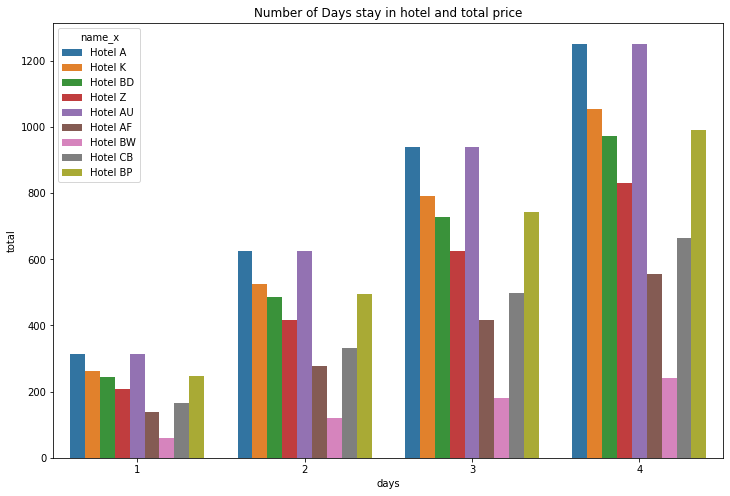

In [ ]:
#Days of staying in hotels with Hotel Name & Total Price
plt.figure(figsize=(12,8))
sns.barplot(x='days',y='total',data=df,hue='name_x')
plt.title('Number of Days stay in hotel and total price')
plt.show()

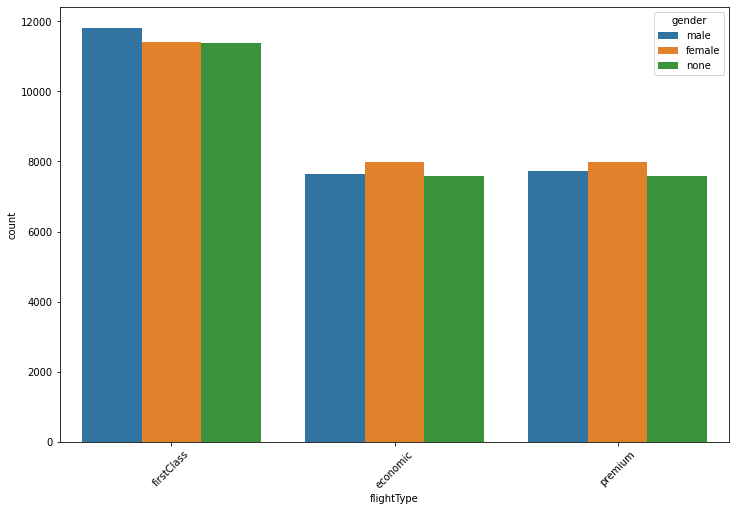

In [ ]:
#Most Used Flight type and Gender
type_df = df.gender
plt.figure(figsize=(12,8))
sns.countplot(x='flightType',data=df,hue='gender')
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Location of hotels and destination place')

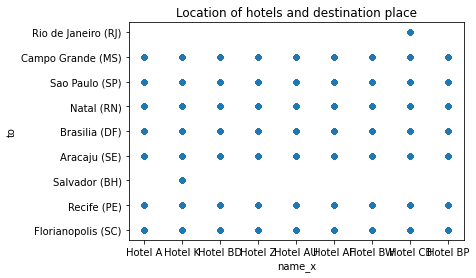

In [ ]:
#find hotels in flight destination
df.plot.scatter(x='name_x', y='to')
plt.title('Location of hotels and destination place')


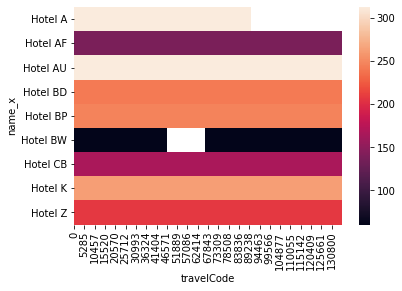

In [ ]:
#most use hotel name & price & Usercode
pc=df.pivot_table(values='Price(Hotel)',index='name_x',columns='travelCode')
sns.heatmap(pc)

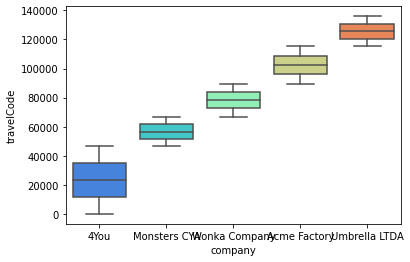

In [ ]:
#Most person travel from Particular company
sns.boxplot(x='company', y='travelCode',data=df,palette='rainbow')

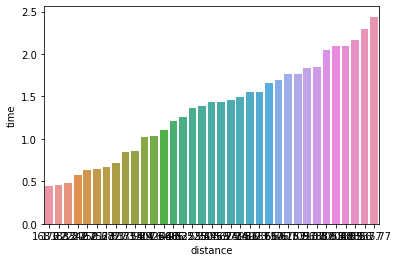

In [ ]:
#Name of flights and its traveling Distance & Time
sns.barplot(x='distance', y='time',data=df)

In [ ]:
len(df.travelCode)

81104

In [ ]:
df.company.unique()

array(['4You', 'Monsters CYA', 'Wonka Company', 'Acme Factory',
       'Umbrella LTDA'], dtype=object)

In [ ]:
nw=df.groupby('gender')['age'].describe()


,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,27380.0,43.328561,13.063461,21.0,32.0,44.0,55.0,65.0
male,27170.0,42.501803,13.074267,21.0,32.0,42.0,54.0,65.0
none,26554.0,42.531445,12.661943,21.0,32.0,42.0,53.0,65.0


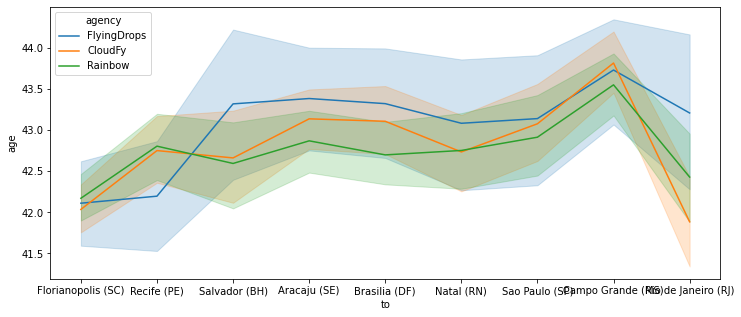

In [ ]:
#Age of persons who travelling in Particular Agency and their their and Destination
plt.figure(figsize=(12,5))
sns.lineplot(x='to',y='age',data=df,hue='agency')
plt.show()